## Neural Network Modeling

In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop



# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers, Input
tf.config.run_functions_eagerly(True)


# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F


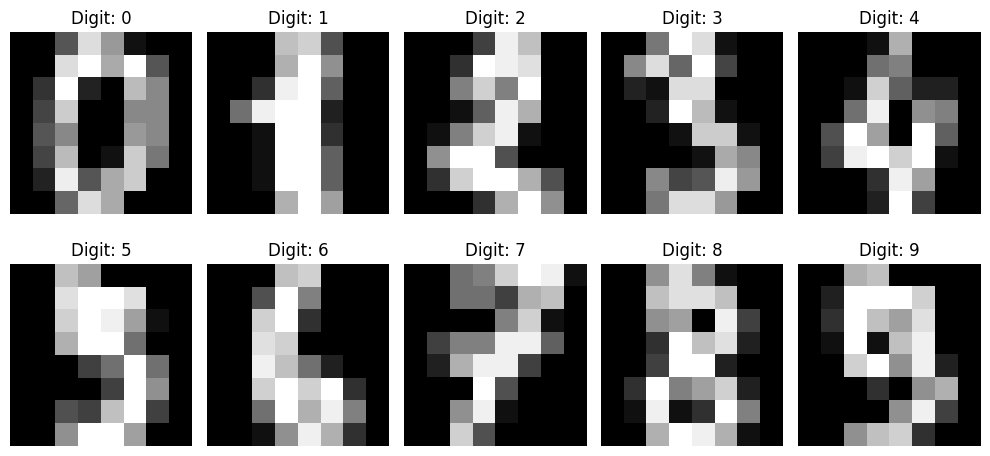

Digits dataset: 1797 samples, 64 features


In [15]:

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)


# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target




# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()


# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

In [16]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.2, random_state=42)

In [17]:
# Create initial model with Adam and relu
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3465 - loss: 3.1134 - val_accuracy: 0.8583 - val_loss: 0.4211
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9107 - loss: 0.3138 - val_accuracy: 0.9444 - val_loss: 0.1879
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 0.1507 - val_accuracy: 0.9611 - val_loss: 0.1347
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0957 - val_accuracy: 0.9694 - val_loss: 0.1165
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9872 - loss: 0.0634 - val_accuracy: 0.9750 - val_loss: 0.1038
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0449 - val_accuracy: 0.9750 - val_loss: 0.0957
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0311 - val_accuracy: 0.9694 - val_loss: 0.0992
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0236 - val_accuracy: 0.9667 - val_loss: 0.0949
Epo

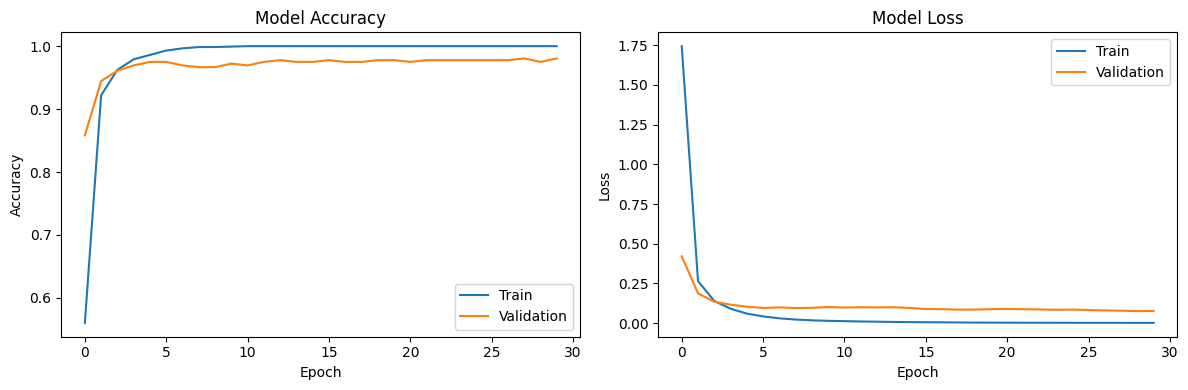

In [18]:
#Plot loss and Accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
#Implement early stopping
early_stop = EarlyStopping(
    monitor='val_loss',       # Metric to watch
    patience=5,               # Wait 5 epochs with no improvement
    min_delta=0.001,
    restore_best_weights=True # Roll back to best weights
)



In [29]:
# Rerun model, same parameters
model2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[early_stop]
)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3800 - loss: 2.7455 - val_accuracy: 0.8611 - val_loss: 0.4321
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.3031 - val_accuracy: 0.9056 - val_loss: 0.2606
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1694 - val_accuracy: 0.9250 - val_loss: 0.2102
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.1084 - val_accuracy: 0.9389 - val_loss: 0.1776
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0759 - val_accuracy: 0.9389 - val_loss: 0.1671
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0520 - val_accuracy: 0.9472 - val_loss: 0.1641
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0370 - val_accuracy: 0.9528 - val_loss: 0.1636
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0283 - val_accuracy: 0.9556 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.85      1.00      0.92        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.83      0.91        30
           9       0.91      0.97      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



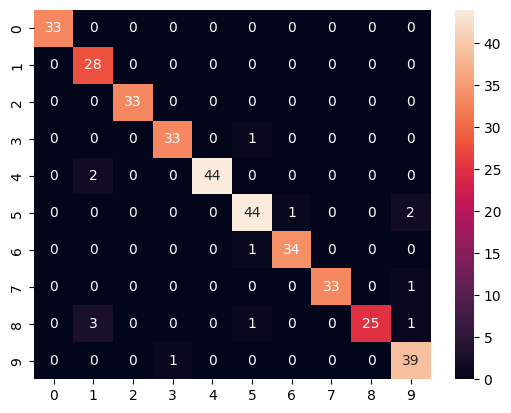

In [36]:
# Print classification report and confusion matrix
predictions = model2.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

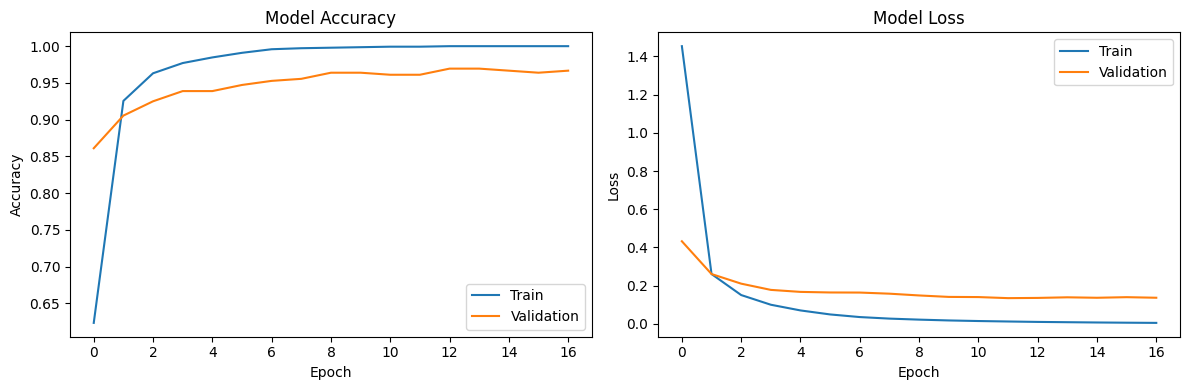

In [32]:
#Plot accuracy and Loss for early stopping model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
class DigitMLP(nn.Module):
    def __init__(self):
        super(DigitMLP, self).__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)  # No softmax here—CrossEntropyLoss expects raw logits


In [34]:
model = DigitMLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        with torch.no_grad():
            model.eval()
            val_output = model(X_test_tensor)
            val_preds = torch.argmax(val_output, dim=1)
            val_accuracy = (val_preds == y_test_tensor).float().mean()
        print(f"Epoch {epoch+1}: Loss={loss.item():.4f}  Val Accuracy={val_accuracy:.4f}")

Epoch 5: Loss=1.8835  Val Accuracy=0.5222
Epoch 10: Loss=1.3526  Val Accuracy=0.7694
Epoch 15: Loss=0.8896  Val Accuracy=0.8694
Epoch 20: Loss=0.5595  Val Accuracy=0.8944
Epoch 25: Loss=0.3642  Val Accuracy=0.9056
Epoch 30: Loss=0.2523  Val Accuracy=0.9278


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.77      0.82      0.79        28
           2       0.97      0.91      0.94        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.93      0.87      0.90        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.90      0.87      0.88        30
           9       0.81      0.88      0.84        40

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



<Axes: >

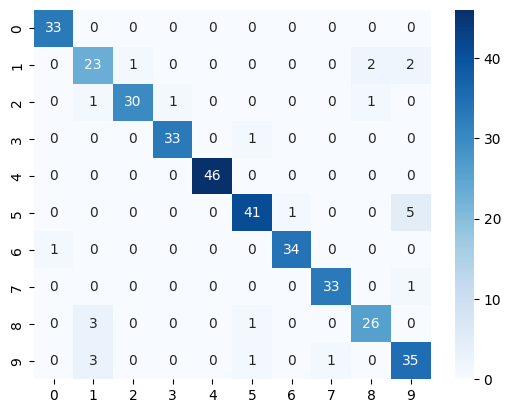

In [38]:
y_true = y_test_tensor.numpy()
y_pred = val_preds.numpy()

print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')



In [56]:
# Different optimizers to test with Adam on base model
optimizers = {
    'adam': lambda: tf.keras.optimizers.Adam(),
    'sgd': lambda: tf.keras.optimizers.SGD(momentum=0.9),
    'rmsprop': lambda: tf.keras.optimizers.RMSprop()
}

#Activations relu and tanh
activations = ['relu', 'tanh']

results = {}
for act_fn in activations:
    for opt_name, opt in optimizers.items():
        print(f"Training with optimizer={opt_name}, activation={act_fn}")

        optimizer = opt()
        model = tf.keras.Sequential([
            layers.Dense(128, activation=act_fn, input_shape=(64,)),
            layers.Dense(64, activation=act_fn),
            layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                            epochs=30, verbose=0)  # Set verbose=1 to see progress

        final_val_acc = history.history['val_accuracy'][-1]
        results[(opt_name, act_fn)] = final_val_acc
        print(f"Validation Accuracy: {final_val_acc:.4f}")


Training with optimizer=adam, activation=relu
Validation Accuracy: 0.9833
Training with optimizer=sgd, activation=relu
Validation Accuracy: 0.9778
Training with optimizer=rmsprop, activation=relu
Validation Accuracy: 0.9750
Training with optimizer=adam, activation=tanh
Validation Accuracy: 0.9889
Training with optimizer=sgd, activation=tanh
Validation Accuracy: 0.9806
Training with optimizer=rmsprop, activation=tanh
Validation Accuracy: 0.9833


In [57]:
best_config = max(results, key=results.get)
print(f"\nBest combination: Optimizer = {best_config[0]}, Activation = {best_config[1]} with val accuracy = {results[best_config]:.4f}")



Best combination: Optimizer = adam, Activation = tanh with val accuracy = 0.9889


In [61]:
#create the best model
best_model = tf.keras.Sequential([
    Input(shape=(64,)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Compile with SGD
best_model.compile(optimizer=Adam(), 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

# Train the model
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4039 - loss: 1.9079 - val_accuracy: 0.8528 - val_loss: 0.7017
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9058 - loss: 0.5429 - val_accuracy: 0.9111 - val_loss: 0.3502
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9602 - loss: 0.2732 - val_accuracy: 0.9306 - val_loss: 0.2385
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9729 - loss: 0.1763 - val_accuracy: 0.9500 - val_loss: 0.1867
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9806 - loss: 0.1270 - val_accuracy: 0.9611 - val_loss: 0.1564
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9876 - loss: 0.0953 - val_accuracy: 0.9611 - val_loss: 0.1382
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9908 - loss: 0.0729 - val_accuracy: 0.9583 - val_loss: 0.1257
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9943 - loss: 0.0565 - val_accuracy: 0.9639 - v

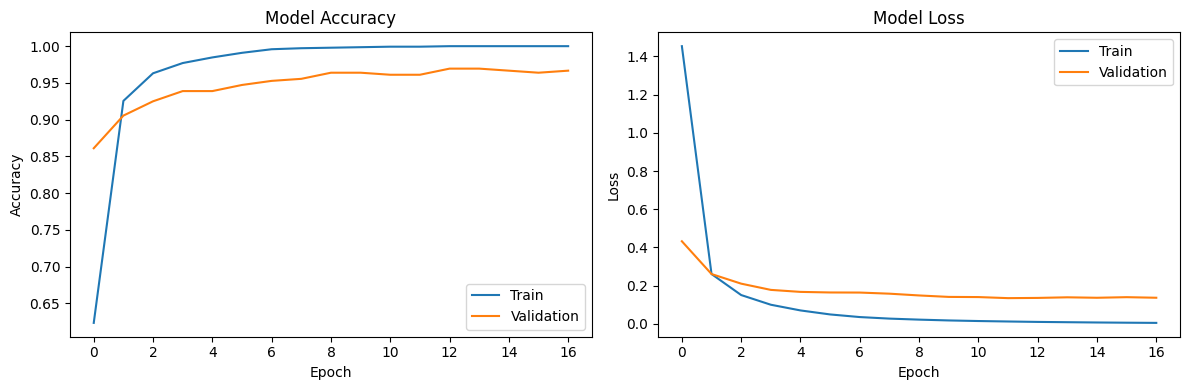

In [62]:
#Plot accuracy and Loss for early stopping model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.97      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


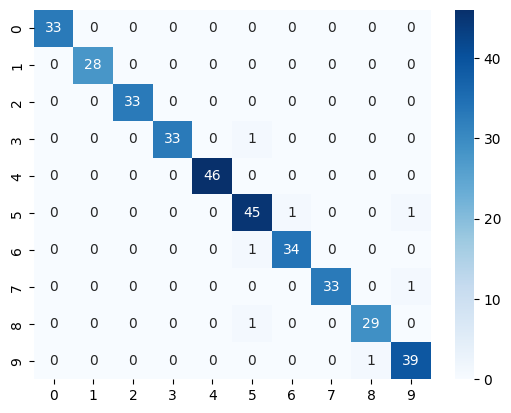

In [71]:
# Print classification report and confusion matrix
predictions = best_model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
